<a href="https://colab.research.google.com/github/mouna0403/Tuto-llm/blob/main/Build_a_Question_Answering_system_over_SQL_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U langchain-groq
!pip install langchain
!pip install -qU langchain-core
!pip install -qU langchain_community
!pip install -qU langchain-text-splitter
!pip install -qU langchain-document-loaders
!pip install -qU typing_extensions
!pip install -qU langgraph
# 🚀 Installation des dépendances
!pip install langchain-ollama
!pip install ollama
!curl -fsSL https://ollama.com/install.sh | sh

# Démarrer le service Ollama en arrière-plan
import subprocess
import time
import os

# Démarrer Ollama en arrière-plan
ollama_process = subprocess.Popen(['ollama', 'serve'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
time.sleep(5)  # Attendre que le service démarre

# Télécharger un modèle léger (Llama 3.2 3B ou Mistral 7B)
!ollama pull llama3.2:3b  # Modèle léger et rapide
# Alternatives :
# !ollama pull mistral:7b
# !ollama pull codellama:7b
# !ollama pull phi3:mini

print("✅ Installation terminée!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.6/449.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
ERROR: Could not find a version that satisfies the requirement langchain-text-splitter (from versions: none)
ERROR: No matching distribution found for langchain-text-splitter
ERROR: Could not find a version that satisfies the requirement langchain-document-loaders (from versions: none)
ERROR: No matching distribution found for langc

In [2]:
# Télécharger la base de données Chinook
!wget https://github.com/lerocha/chinook-database/raw/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite

# Renommer pour simplifier
!mv Chinook_Sqlite.sqlite Chinook.db

# Vérifier que le fichier existe
!ls -lh Chinook.db

--2025-10-04 17:48:03--  https://github.com/lerocha/chinook-database/raw/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite [following]
--2025-10-04 17:48:03--  https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1067008 (1.0M) [application/octet-stream]
Saving to: ‘Chinook_Sqlite.sqlite’

Chinook_Sqlite.sqli 100%[===================>]   1.02M  --.-KB/

In [3]:
from langchain_community.utilities import SQLDatabase

db = SQLDatabase.from_uri("sqlite:///Chinook.db")
print(db.dialect)
print(db.get_usable_table_names())
db.run("SELECT * FROM Artist LIMIT 10;")

sqlite
['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


"[(1, 'AC/DC'), (2, 'Accept'), (3, 'Aerosmith'), (4, 'Alanis Morissette'), (5, 'Alice In Chains'), (6, 'Antônio Carlos Jobim'), (7, 'Apocalyptica'), (8, 'Audioslave'), (9, 'BackBeat'), (10, 'Billy Cobham')]"

In [4]:
import getpass
import os

token=getpass.getpass("Enter API key for Groq: ")
os.environ["GROQ_API_KEY"] = token

from langchain.chat_models import init_chat_model

llm = init_chat_model("llama-3.1-8b-instant", model_provider="groq")


Enter API key for Groq: ··········


In [5]:
llm.invoke("hello, I am Maïmouna, guess the origin of my name and tell me the country(ies)")

AIMessage(content='Hello Maïmouna, I\'d be happy to help you with the origin of your name.\n\nMaïmouna is a feminine given name of African origin, specifically from the Wolof and Serer people of West Africa, primarily found in Senegal and The Gambia. \n\nIn Wolof, a Senegalese language, "Maïmouna" is derived from "mouna," which means "peace" and "ma" which is an honorific prefix. So, the name Maïmouna can be roughly translated to "peaceful" or "blessed with peace." \n\nIn Serer culture, the name Maïmouna is also associated with the virtue of peace and calmness.\n\nSo, to answer your question, the country of origin of your name is Senegal and The Gambia, both located in West Africa.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 181, 'prompt_tokens': 59, 'total_tokens': 240, 'completion_time': 0.332934229, 'prompt_time': 0.004031179, 'queue_time': 0.391823504, 'total_time': 0.336965408}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32

In [7]:
from langchain_core.prompts import ChatPromptTemplate

system_message = """
Given an input question, create a syntactically correct {dialect} query to
run to help find the answer. Unless the user specifies in his question a
specific number of examples they wish to obtain, always limit your query to
at most {top_k} results. You can order the results by a relevant column to
return the most interesting examples in the database.

Never query for all the columns from a specific table, only ask for a the
few relevant columns given the question.

Pay attention to use only the column names that you can see in the schema
description. Be careful to not query for columns that do not exist. Also,
pay attention to which column is in which table.

Write only the SQL query in the JSON format specified),
#     ("human", "{input}")

Only use the following tables:
{table_info}
"""

user_prompt = "Question: {input}"

query_prompt_template = ChatPromptTemplate(
    [("system", system_message), ("user", user_prompt)]
)

# for message in query_prompt_template.messages:
#     message.pretty_print()

In [8]:
from typing_extensions import TypedDict
class State(TypedDict):
    question: str
    query: str
    result: str
    answer: str

In [9]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field

# Définir le schéma avec Pydantic
class QueryOutput(BaseModel):
    """Generated SQL query."""
    query: str = Field(description="Syntactically valid SQL query") #Field: Décrire une "case" dans ton objet : type, description, valeur par défaut…

# Créer le parser
parser = JsonOutputParser(pydantic_object=QueryOutput) #parser Vérifier que la sortie du modèle est bien conforme au format attendu et transformer le texte en objet Python utilisable.

# Modifier write_query
def write_query(state: State):
    """Generate SQL query to fetch information."""
    prompt = query_prompt_template.invoke(
        {
            "dialect": db.dialect,
            "top_k": 10,
            "table_info": db.get_table_info(),
            "input": state["question"],
            "format_instructions": parser.get_format_instructions()
        }
    )
    result = llm.invoke(prompt)
    parsed_result = parser.parse(result.content)
    return {"query": parsed_result["query"]}

# Test
result = write_query({"question": "How many Employees are there?"})
print(result)

/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


{'query': 'SELECT COUNT(*) AS num_Employees FROM Employee'}


In [10]:
write_query({"question": "How many Employees are there?"})

{'query': 'SELECT COUNT(*) FROM Employee'}

In [11]:
from langchain_community.tools.sql_database.tool import QuerySQLDatabaseTool #outil prêt à l’emploi pour exécuter des requêtes SQL sur une base de données


def execute_query(state: State):
    """Execute SQL query."""
    execute_query_tool = QuerySQLDatabaseTool(db=db) #On crée un objet execute_query_tool qui sait parler à ta base de données db.
    return {"result": execute_query_tool.invoke(state["query"])}

In [12]:
execute_query({"query": "SELECT COUNT(EmployeeId) AS EmployeeCount FROM Employee;"})

{'result': '[(8,)]'}

In [13]:
def generate_answer(state: State):
    """Answer question using retrieved information as context."""
    prompt = (
        "Given the following user question, corresponding SQL query, "
        "and SQL result, answer the user question.\n\n"
        f"Question: {state['question']}\n"
        f"SQL Query: {state['query']}\n"
        f"SQL Result: {state['result']}"
    )
    response = llm.invoke(prompt)
    return {"answer": response.content}

In [14]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence(
    [write_query, execute_query, generate_answer]
)
graph_builder.add_edge(START, "write_query")
graph = graph_builder.compile()

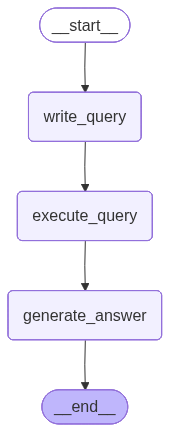

In [15]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
graph.invoke({"question": "tell me all about all employees"})

{'question': 'tell me all about all employees',
 'query': 'SELECT FirstName, LastName, Title, BirthDate, HireDate, Email FROM Employee',
 'result': "[('Andrew', 'Adams', 'General Manager', '1962-02-18 00:00:00', '2002-08-14 00:00:00', 'andrew@chinookcorp.com'), ('Nancy', 'Edwards', 'Sales Manager', '1958-12-08 00:00:00', '2002-05-01 00:00:00', 'nancy@chinookcorp.com'), ('Jane', 'Peacock', 'Sales Support Agent', '1973-08-29 00:00:00', '2002-04-01 00:00:00', 'jane@chinookcorp.com'), ('Margaret', 'Park', 'Sales Support Agent', '1947-09-19 00:00:00', '2003-05-03 00:00:00', 'margaret@chinookcorp.com'), ('Steve', 'Johnson', 'Sales Support Agent', '1965-03-03 00:00:00', '2003-10-17 00:00:00', 'steve@chinookcorp.com'), ('Michael', 'Mitchell', 'IT Manager', '1973-07-01 00:00:00', '2003-10-17 00:00:00', 'michael@chinookcorp.com'), ('Robert', 'King', 'IT Staff', '1970-05-29 00:00:00', '2004-01-02 00:00:00', 'robert@chinookcorp.com'), ('Laura', 'Callahan', 'IT Staff', '1968-01-09 00:00:00', '2004-

In [17]:
for step in graph.stream(
    {"question": "How many employees are there?"}, stream_mode="updates"
):
    print(step)

{'write_query': {'query': 'SELECT COUNT(*) FROM Employee'}}
{'execute_query': {'result': '[(8,)]'}}
{'generate_answer': {'answer': 'Based on the SQL result, the answer to the user question "How many employees are there?" is:\n\nThere are 8 employees.'}}


In [18]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory, interrupt_before=["execute_query"])

# Now that we're using persistence, we need to specify a thread ID
# so that we can continue the run after review.
config = {"configurable": {"thread_id": "1"}}

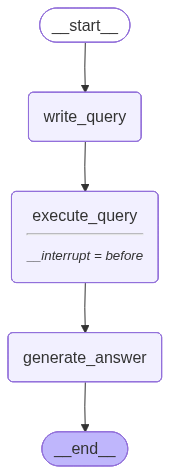

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
for step in graph.stream(
    {"question": "How many employees are there?"},
    config,
    stream_mode="updates",
):
    print(step)

try:
    user_approval = input("Do you want to go to execute query? (yes/no): ")
except Exception:
    user_approval = "no"

if user_approval.lower() == "yes":
    # If approved, continue the graph execution
    for step in graph.stream(None, config, stream_mode="updates"):
        print(step)
else:
    print("Operation cancelled by user.")

{'write_query': {'query': 'SELECT COUNT(*) FROM Employee'}}
{'__interrupt__': ()}
Do you want to go to execute query? (yes/no): no
Operation cancelled by user.


In [31]:
# Installation
# !pip install langchain-groq langchain-community langgraph

from langchain.chat_models import init_chat_model
from langchain_community.utilities import SQLDatabase
from langchain_community.tools.sql_database.tool import QuerySQLDatabaseTool
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain.tools import tool
from langgraph.prebuilt import create_react_agent

# ============================================
# SETUP
# ============================================
#llm = init_chat_model("llama-3.1-8b-instant", model_provider="groq")
#db = SQLDatabase.from_uri("sqlite:///your_database.db")

# ============================================
# TON RAG COMME OUTIL
# ============================================

class QueryOutput(BaseModel): #La sortie générée par ton LLM (modèle de langage) devra respecter ce format JSON :{ "query": "SELECT ... FROM ..." }
    """Generated SQL query."""
    query: str = Field(description="Syntactically valid SQL query")

parser = JsonOutputParser(pydantic_object=QueryOutput)

query_prompt_template = ChatPromptTemplate([
    ("system", """Given an input question, create a syntactically correct {dialect} query.
Unless specified, limit to {top_k} results.
Only use columns that exist in the schema.

Write only the SQL query in JSON format: {{"query": "your SQL here"}}

Available tables:
{table_info}"""),
    ("user", "{input}")
])

@tool
def query_database(question: str) -> str:
    """
    Interroge la base de données SQL en langage naturel.
    Utilise cet outil pour toute question nécessitant des données de la base.
    """
    try:
        # Générer la requête SQL
        prompt = query_prompt_template.invoke({
            "dialect": db.dialect,
            "top_k": 10,
            "table_info": db.get_table_info(),
            "input": question
        })

        result = llm.invoke(prompt) #on demande au modèle de traduire le prompt en SQL.

        parsed_result = parser.parse(result.content) #parse la sortie du modèle (car le modèle peut répondre avec du texte ou du JSON).

        sql_query = parsed_result["query"] # on extrait la vraie requête SQL générée.

        # Exécuter la requête
        execute_tool = QuerySQLDatabaseTool(db=db)
        sql_result = execute_tool.invoke(sql_query)


        return f"Requête : {sql_query}\n\nRésultats :\n{sql_result}"

    except Exception as e:
        return f"Erreur : {str(e)}"

# ============================================
# AGENT AVEC UN SEUL OUTIL
# ============================================

agent = create_react_agent(
    llm,
    [query_database],  # UN SEUL OUTIL
    prompt="Tu es un assistant.  utilise l'outil query_database pour répondre aux questions que si necessaire. Réponds avec la meme langue que l'utilisateur."
)

# ============================================
# UTILISATION
# ============================================

def ask(question: str):
    """Pose une question à l'agent."""
    for chunk in agent.stream({"messages": [("user", question)]}, stream_mode="values"):
        if "messages" in chunk:
            msg = chunk["messages"][-1]
            if hasattr(msg, "content") and msg.content:
                print(msg.content)

# Exemples

ask("How many employees are there?")


How many employees are there?
Requête : SELECT COUNT(*) FROM Employee

Résultats :
[(8,)]
Il y a 8 employés dans l'entreprise.


In [34]:

def chat():
    while True:
        q = input("\n💬 Vous : ")
        if q.lower() in ['exit', 'quit']: break
        ask(q)
        print("\n")

chat()


💬 Vous : hey
Hello. How can I assist you today?



💬 Vous : exit
